In [1]:
import numpy as np
import matplotlib.pyplot as plt
import crispr_assembler as ca 
%load_ext autoreload
%autoreload 2

from tqdm import tqdm_notebook

In [2]:
with open("../../article/data/filtered/ES3.merged.assembled.fastq") as f:
    lines = [x[:-1] for x in f.readlines()]

In [2]:
nplets = [l.split("\t") for l in lines[::2]]

In [4]:
def crit(x):
    return all([len(y) > 25 for y in x])
    

In [5]:
nplets_filtered = []

for nplet in nplets:
    new_nplet = []
    for sp in nplet:
        if len(sp) < 25 or len(sp) > 40:
            if len(new_nplet) > 0:
                nplets_filtered.append(new_nplet)
                new_nplet = []
        else:
            new_nplet.append(sp)
    if len(new_nplet):
        nplets_filtered.append(new_nplet)

In [4]:
len(nplets)

83359

In [8]:
nplets_f_2 = [x for x in nplets_filtered if len(x) >= 2]

(array([7.5794e+04, 4.0376e+04, 0.0000e+00, 1.6045e+04, 0.0000e+00,
        7.9300e+03, 1.8760e+03, 0.0000e+00, 2.8800e+02, 4.0000e+00]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <a list of 10 Patch objects>)

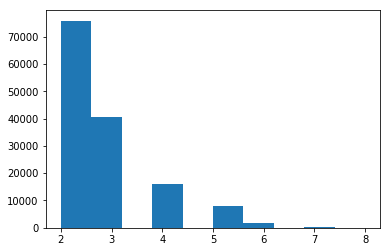

In [44]:
plt.hist([len(x) for x in nplets_f_2_ind])

In [7]:
sp_to_ind = ca.dict_from_csv("../../data/ES/restored/ES3_R1_pairs_sp_to_ind")

In [8]:
sp_to_ind = dict(zip(sp_to_ind.keys(), map(int, sp_to_ind.values())))

In [9]:
sp_to_ind

{'ACACGCCCTTATCAAATAGCTGTGATTTACCTA': 0,
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC': 1,
 'AGTGCTGGACCATTTCAAATTCACAATAGATT': 2,
 'ATAGACCCCGAACAACAATACGCGCAAACCGA': 3,
 'CAAGTGATATCCATCATCGCATCCAGTGCGCC': 4,
 'GGAATGATATTTCAATAAATAATTATAACAAT': 5,
 'TACCGTACAGACTGCCGGATATTATTTTTTTG': 6,
 'CCCTCACACCGATTCGCCAAACGGTGGAGAAG': 7,
 'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATAG': 8,
 'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCGC': 9,
 'TGCATGGCTTTGGCTTCCTCTTTGACGGACGC': 10,
 'AGCTGGGCGAAATTTTGATTCATCGTGATGAC': 11,
 'TATAGAGATCGTTTTTGGAATTTACAGCGAGG': 12,
 'ATATATCAGAGCAAAAAACAAAGCCACAGCCA': 13,
 'CATAAAGAAACTATTTTGCGTTTCGTTCAGGT': 14,
 'TTTTACAGTGTCAACAATCGTTCCCTGATTGT': 15,
 'CCGTAAGTGGTTTGAGCGATGATATTTGTGCT': 16,
 'CCGCCGTTGGCACCGTCAAACTCCGGTACTGT': 17,
 'GTAGTCCATCATTCCACCTATGTCTGAACTCC': 18,
 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG': 19,
 'CTGTTTTCGCAAATCTATGGACTATTGCTATT': 20,
 'GAAATGCTGGTGAGCGTTAATGCCGCAAACAC': 21,
 'GGGCGCACGGAATACAAAGCCGTGTATCTGCT': 22,
 'TGGCTCTGCAACAGCAGCACCCATGACCACGT': 23,
 'CAGCGTCAGGCGTGAAATCTCAC

In [16]:
p = Pool(8)

In [17]:
def func(x):
    return ca.array_to_ids(x, sp_to_ind)

In [24]:
nplets_ind = list(p.imap(func, tqdm_notebook(nplets[:])))

A Jupyter Widget

In [29]:
nplets_f_2_ind_l = list(nplets_f_2_ind)

In [20]:
def gr_from_arrays(arrays):
    gr = np.zeros((100,100))

    for npl in arrays:
        for a,b in zip(npl, npl[1:]):
            gr[a,b] += 1
    return gr

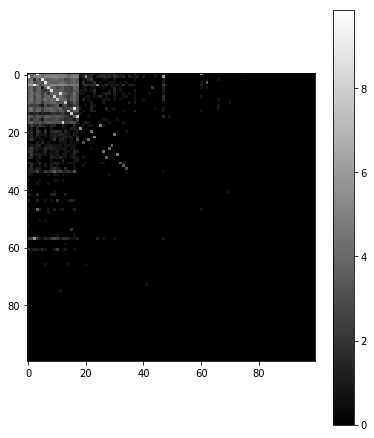

In [25]:
ca.plot_gr(gr_from_arrays(nplets_ind), log =1, s = 10)

In [55]:
nplets_t_2 = [n for n in nplets_f_2_ind if len(n) ==2]

gr_all = gr_from_arrays(nplets_f_2_ind)
gr_2 = gr_from_arrays([n for n in nplets_f_2_ind if len(n) == 2])
gr_3 = gr_from_arrays([n for n in nplets_f_2_ind if len(n) == 3])
gr_4 = gr_from_arrays([n for n in nplets_f_2_ind if len(n) == 4])

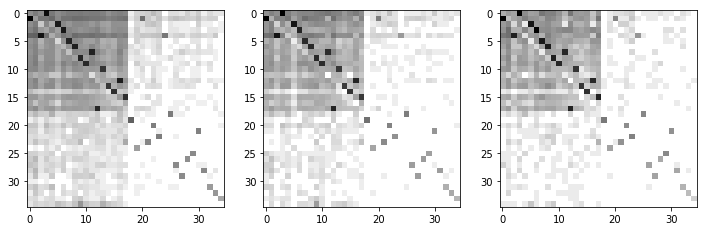

In [78]:
ca.plot_grs(gr_all[:35, :35], gr_3[:35,:35], gr_4[:35, :35], log=1, s = 12)

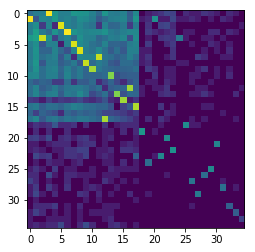

In [49]:
plt.imshow(np.log(gr[:35, :35] + 1))

In [59]:
lines[1::2]

['IIIIIIIIIIIIIIIIIIIIIIIIIIIIII\tIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIII\tIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
 '?I??III?I2BIIIIII>@I@E>IIAI@IIIIII>II@>III?I?IIAAIIII?IIIAI@???IIIIII',
 'IIIIIIIIIIIIIHIIIIIIIIIIIIIII\tIIIIIIIIIIIIIIIIIIIIIIIIIIIIII\tII',
 'GGFFGHHFHDHHHHHHHHGFGGGHHFGHGG\tIIIIIIIIIIIIGIIIIIIIIIIIIIIIII\tIIIIIIIIIIIIIIIIIIIIIIIIIIIII\tIIIIIIIIIIIIIIIIIIIIIIIIIIIII\tHHHDGGGHHHHGHHHHHHFGGHEEFFGGGGGGGGGFFFCCBCCCCCC',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIII\tIIIIIIIIIIIIIIIIIIIIIIIIIIIIII\tII',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIAIIIIIIII>\tIIIHIIIIIIGIIIIIIIIIIHIEAIIIE?II',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIII\tIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIII\tIIIIIIIIIIIIIIIIIIIIIIIIIIIHIII',
 'IIIIIIIIIICIIIIIIIIIIIIIIIIII\tIII?IIIIIIII;IIIIIIIFIIIIIIII\tIIIII=IIIIIII=II<IGG/<IEIII;I\tIII9FIIFIIIIIIIII3>',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII\tIIIIIIIIII',
 'IIIIIIIIIIIIIIIIIIIIIIIIIIIII\tIIIIIF=IIIIIII=IIIIIIIIFIIIIIIII',
 'IIIIIII

In [60]:
import pickle

In [61]:
pickle.dump(nplets_f_2_ind, open("./ES3_nplets", 'wb'))

In [69]:
quality_symbols1 = r'!"#$%&' 
quality_symbols2 = "'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~"



quality_dict = {}
quality_dict_r = {}
for i, char in enumerate(quality_symbols1 + quality_symbols2):
    quality_dict[char] = i
    quality_dict_r[i] = char

get_quality = lambda x: quality_dict[x]

def get_lowest_q(array, gq = get_quality):
    return quality_dict[min(array, key=gq)]

In [76]:
qualyties = [get_lowest_q(''.join(x.split("\t"))) for x in tqdm_notebook(lines[1::2])]

A Jupyter Widget

(array([8.7410e+03, 8.5030e+03, 2.4340e+03, 1.7000e+01, 1.1720e+03,
        1.0117e+04, 1.3551e+04, 1.8396e+04, 7.3010e+03, 1.3606e+05]),
 array([12. , 14.8, 17.6, 20.4, 23.2, 26. , 28.8, 31.6, 34.4, 37.2, 40. ]),
 <a list of 10 Patch objects>)

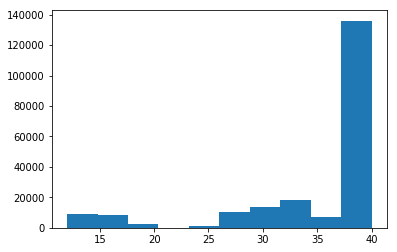

In [77]:
plt.hist(qualyties)

In [4]:
gr = np.load("../../data/graphs/ES3.npy")

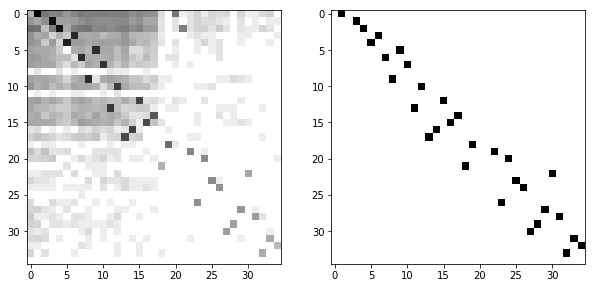

In [20]:
ca.plot_grs(gr[:35, :35], answ_gr[:35, :35], log = 1)    

In [16]:
def calc_noise_ratio(gr0, gr):
    return 1 - gr[gr0>0].sum() / gr.sum(), ((gr > 0).sum() - (gr0 > 0).sum()) / gr.flatten().shape[0]

In [9]:
arrays, weights  = ca.restore_arrays(gr)

In [13]:
answ_gr = ca.graph_from_arrays(arrays)[0]

In [14]:
answ_gr.shape

(42, 42)

In [21]:
calc_noise_ratio(answ_gr[:35, :35], gr[:35, :35])

(0.12484240457093809, 0.43020408163265306)